In [102]:
import pandas as pd
import numpy as np
#import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt
import random

In [23]:
mat = sio.loadmat("/Users/mamadymagassouba/Desktop/Emploi/Volinergy/Oxford_Battery_Degradation_Dataset_1.mat")

In [197]:
x=mat['Cell1']
for i in range(11):
    print(len(x))
    if i==2:
        x=x[77]# we can move from 0 at 77 to verifie that the number of observation varies
    else: 
        x=x[0]

1
1
78
1
1
4
1
1
4
2580
1


In [204]:
type(mat["Cell1"][0][0][0][0][0][0][0][0][0][0])

numpy.ndarray

In [199]:
len(mat["Cell1"][0][0][0][0][0])

4

In [24]:
cells = ['Cell1', 'Cell2', 'Cell3', 'Cell4', 'Cell5', 'Cell6', 'Cell7', 'Cell8'] # mat.keys()

In [178]:
cycles[10]

'cyc1000'

In [179]:
cycles = [c for c in str(mat["Cell1"][0][0].dtype).split("'") if "cyc" in c]


In [180]:
types = ['C1ch', 'C1dc', 'OCVch', 'OCVdc'] # mat["Cell1"][0][0][70].dtype

In [181]:
cols = ['t', 'v', 'q', 'T'] # mat["Cell1"][0][0][70][0][0][3].dtype 

In [28]:
def is_array(arr):
    try:
        _ = len(arr)
        boul = True
    except:
        boul = False
    return boul 

In [29]:
def inner_nest(arr):
    if is_array(arr):
        while is_array(arr) and len(arr) == 1:
            arr = arr[0]
    return arr 

In [30]:
def nest(arr):
    if not is_array(arr):
        return arr
    elif len(arr) == 1:
        return nest(arr[0])  
    else:
        ls = [] 
        arr = inner_nest(arr)
        for ar in arr:
            ls.append(nest(ar)) 
        return ls


In [196]:
len(mat["Cell1"][0][0][0][0][0])

4

In [ ]:
#def nest(arr):
#    arr = inner_nest(arr)
#    if not is_array(arr):
#        return arr
#    else:
#        ls = [] 
#        #arr = inner_nest(arr)
#        for ar in arr:
#            ls.append(nest(ar)) 
#        return ls
#    # [nest(ar) for ar in arr]

In [ ]:
#def nest(arr):
#    arr = inner_nest(arr)
#    if not is_array(arr):
#        return arr
#    else:
#        return [nest(ar) for ar in arr]  
    

In [14]:
data = []
for cell in cells:
    data.append(nest(mat[cell])) 

In [206]:
len(data), len(data[0]), len(data[0][0]), len(data[0][0][0]), len(data[0][3][0][0]) 

(8, 78, 4, 4, 3427)

In [17]:
# cells, cycles, types, cols
dfs = []
for cell_id in range(len(cells)):
    for cyc_id in range(len(data[cell_id])):
        for typ_id in range(len(types)):
            #print(cells[cell_id], cycles[cyc_id], types[typ_id])
            arr = np.array(data[cell_id][cyc_id][typ_id]).T
            df = pd.DataFrame(arr)
            df.columns = cols
            df["type"] = types[typ_id]
            df["cycle"] = cycles[cyc_id]
            df["cell"] = cells[cell_id]
            dfs.append(df) 

In [21]:
dff = pd.concat(dfs)

In [20]:
dff.shape

(15264130, 7)

In [290]:
#dff.to_csv("battery.csv")

In [147]:
x = dff.sample(100).apply(lambda r: r['q'] / maxi.loc[r["cell"], r["type"], r["cycle"]]["q"], axis = 1)

<ipython-input-147-4b37cfce92c5>:1: RuntimeWarning: divide by zero encountered in double_scalars
  x = dff.sample(100).apply(lambda r: r['q'] / maxi.loc[r["cell"], r["type"], r["cycle"]]["q"], axis = 1)


0.9982069176267279

In [159]:
maxi = dff.groupby(["cell", "type", "cycle"]).min()

In [142]:
maxi.loc["Cell1", "C1ch", "cyc0000"]

t    735954.899575
v         4.199977
q       724.120891
T        41.295536
Name: (Cell1, C1ch, cyc0000), dtype: float64

In [163]:
maxi[maxi["q"] < 0.00001]

t         v           q          T
cell  type  cycle                                                  
Cell1 C1ch  cyc0000  735954.858966  2.719213   -0.000049  39.314987
            cyc0100  735962.024468  2.719614   -0.000049  39.277512
            cyc0200  735969.178111  2.719775   -0.000049  39.265045
            cyc0300  735977.832295  2.720641   -0.000049  39.290016
            cyc0400  735984.968250  2.720881   -0.000049  39.252537
...                            ...       ...         ...        ...
Cell8 OCVdc cyc7600  736565.110924  2.700212 -574.471645  39.657227
            cyc7700  736571.926181  2.700132 -572.982491  39.669693
            cyc7800  736578.738183  2.700052 -571.643579  39.682201
            cyc7900  736587.058535  2.700012 -570.896403  39.644760
            cyc8000  736593.866940  2.699971 -569.352707  39.657227

[2076 rows x 4 columns]

In [160]:
maxi_ = maxi.reset_index()

In [164]:
fr = maxi_[maxi_["cell"] == "Cell1"]
fr = fr[fr["type"] == "C1ch"]

In [ ]:
plt.scatter(fr['t'],fr['q'])

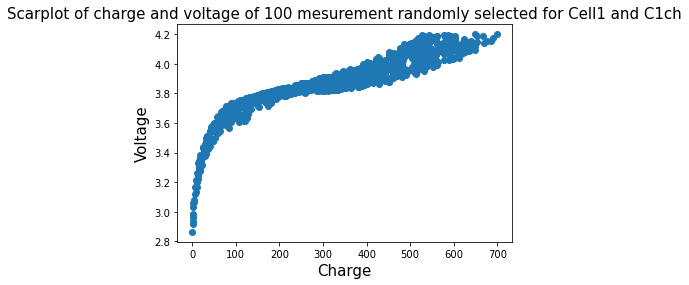

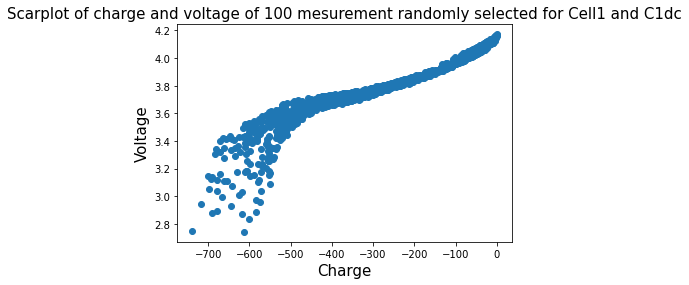

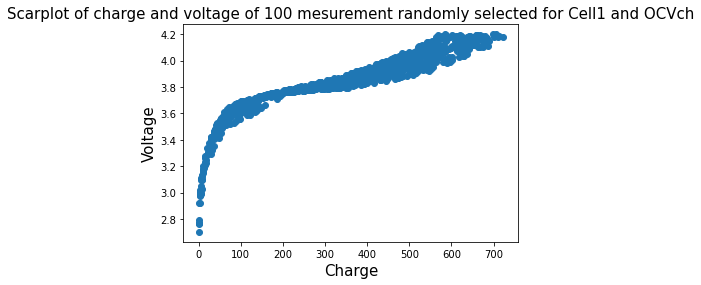

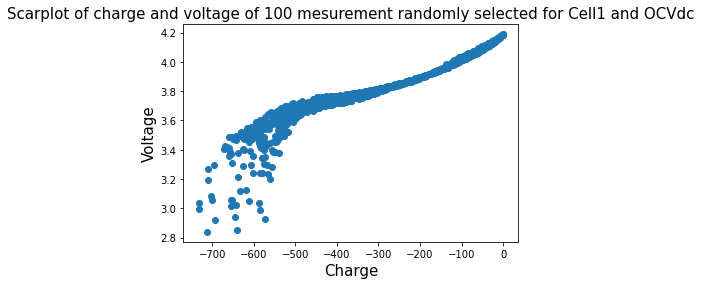

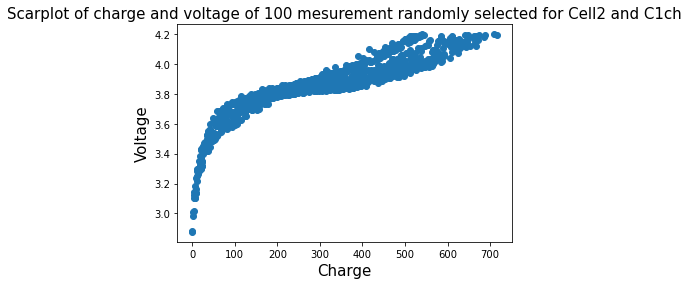

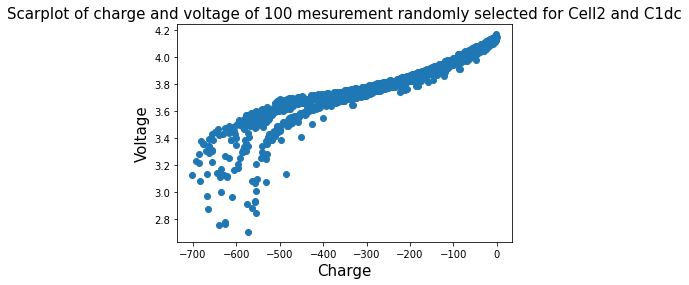

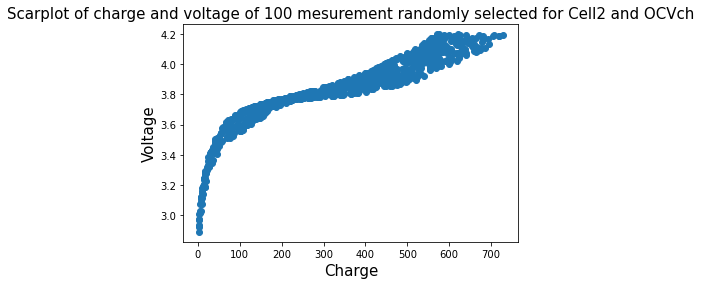

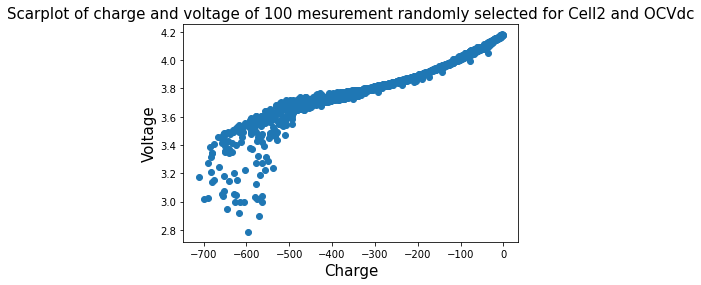

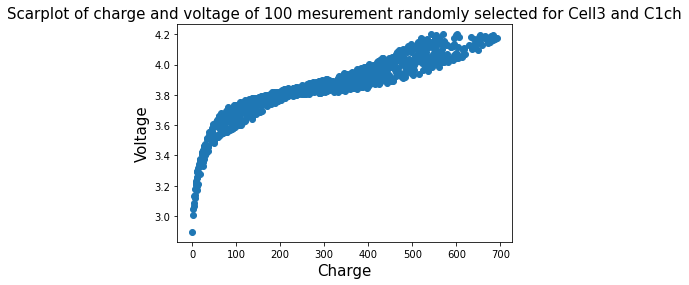

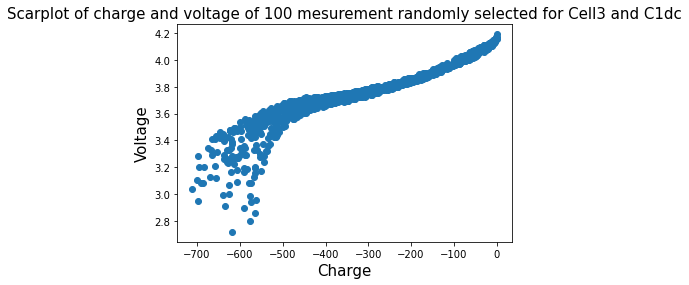

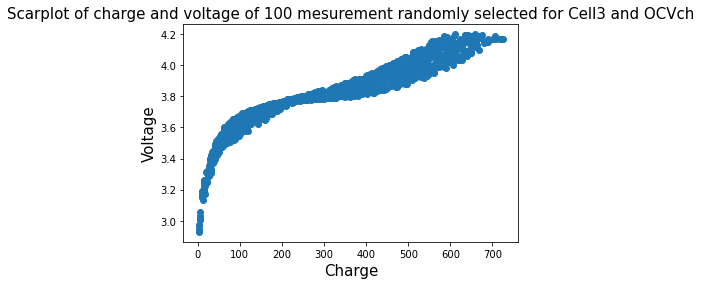

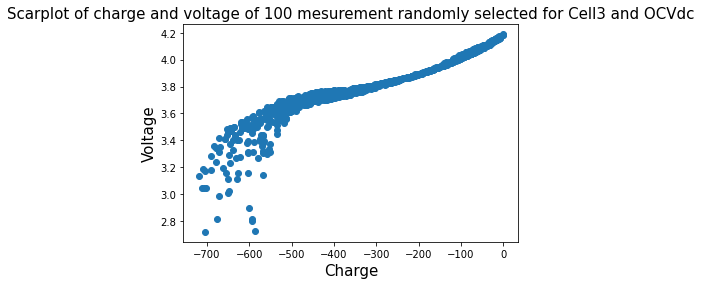

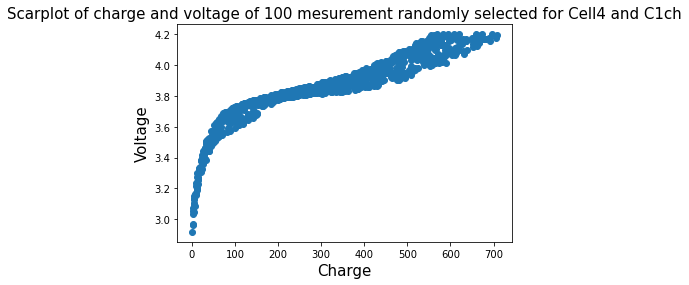

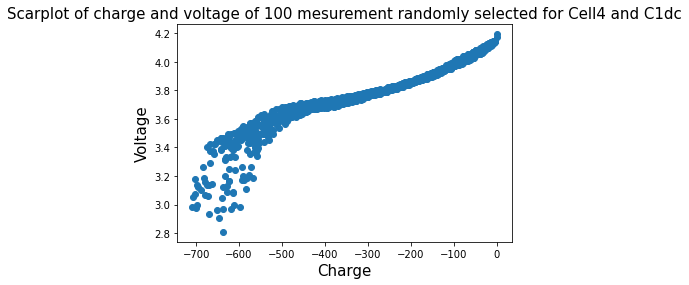

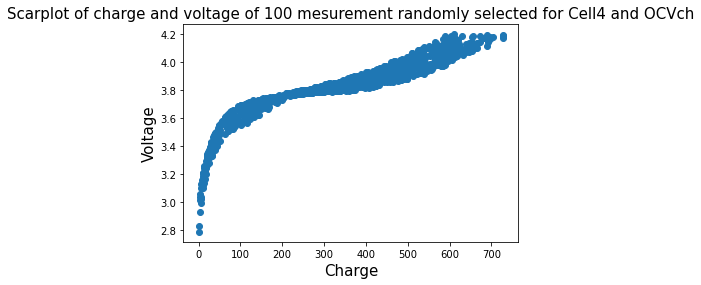

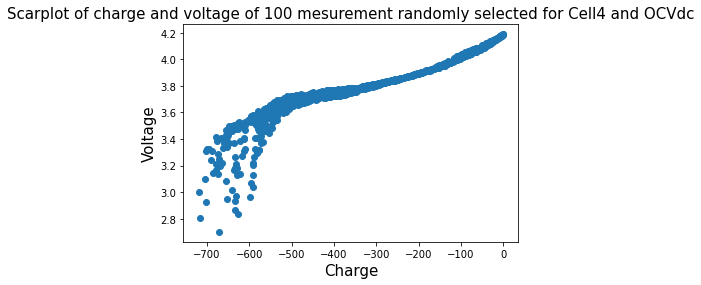

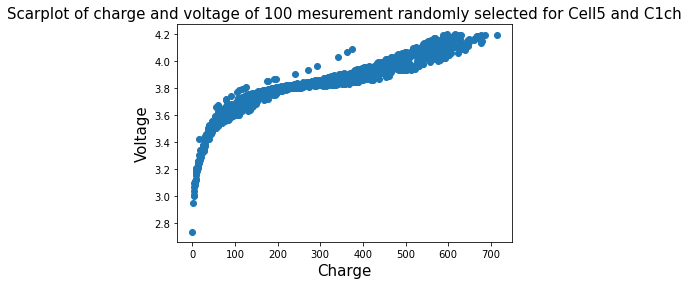

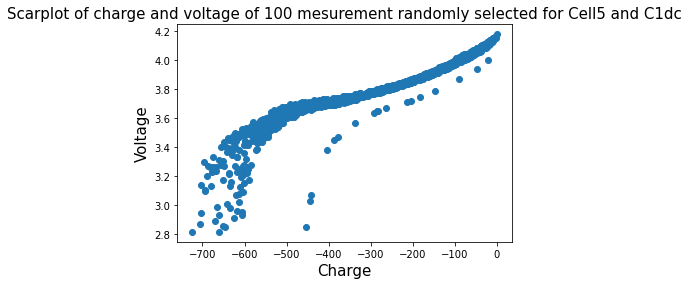

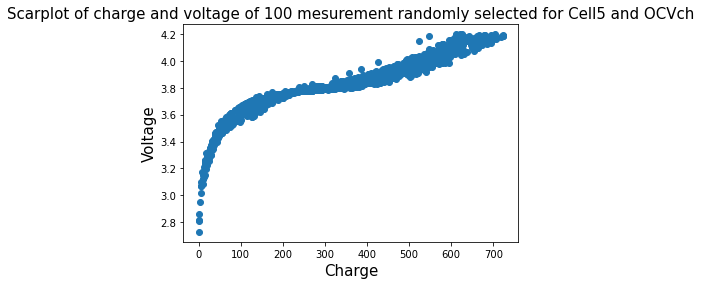

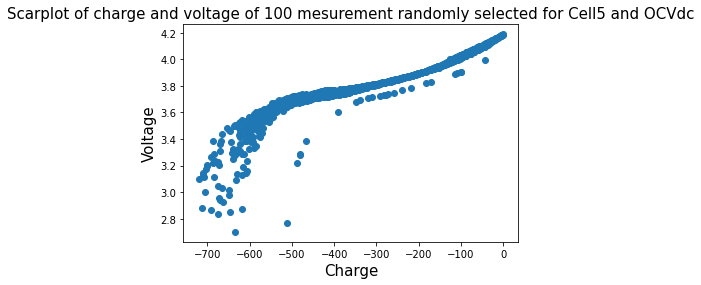

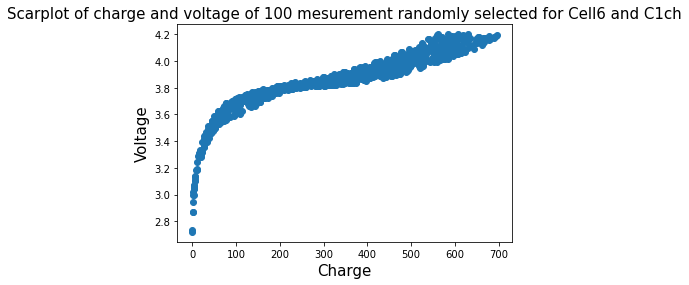

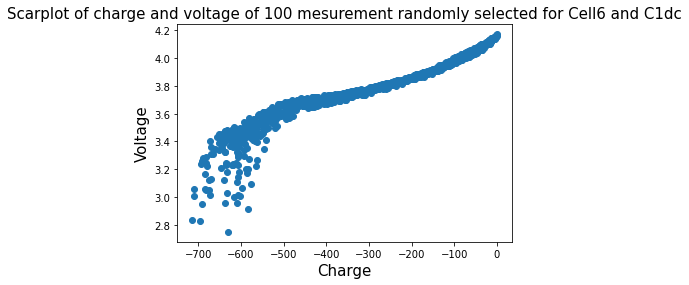

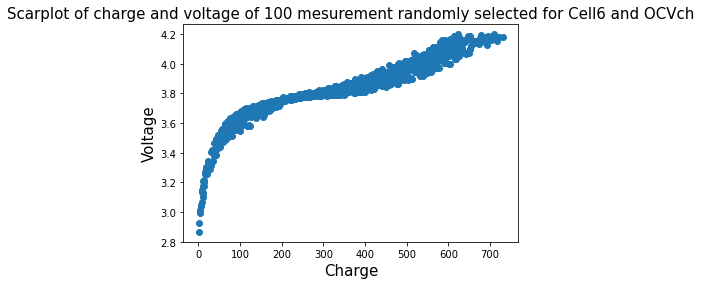

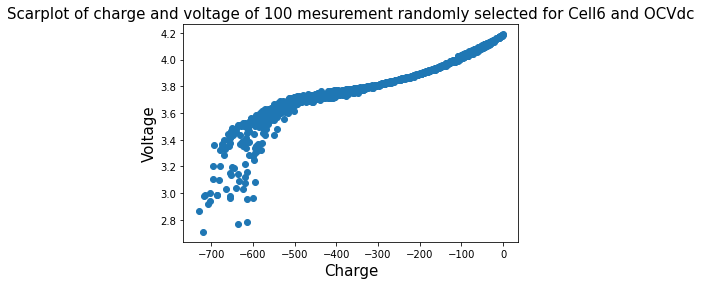

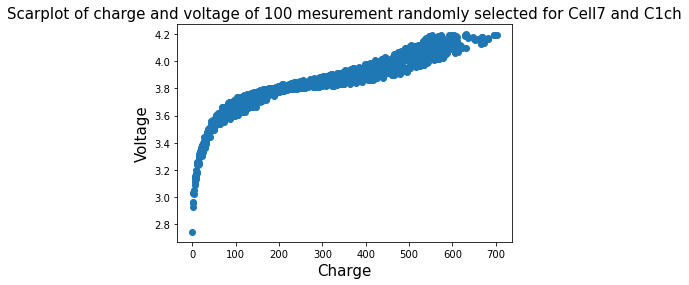

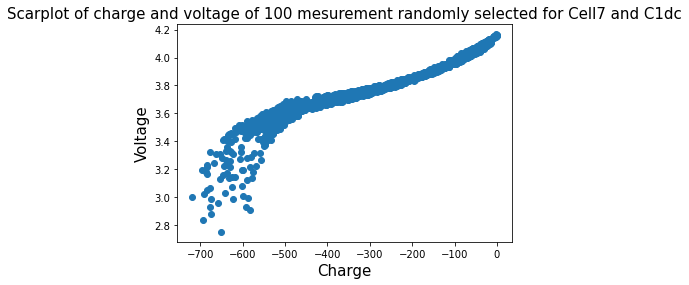

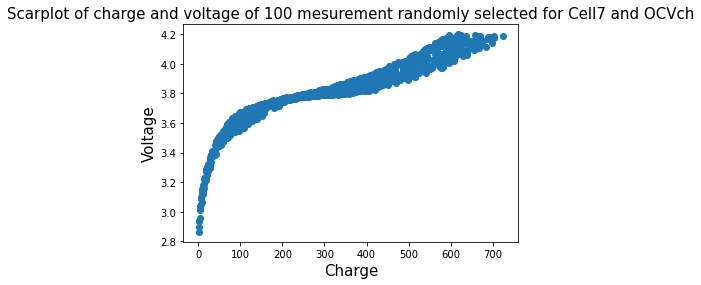

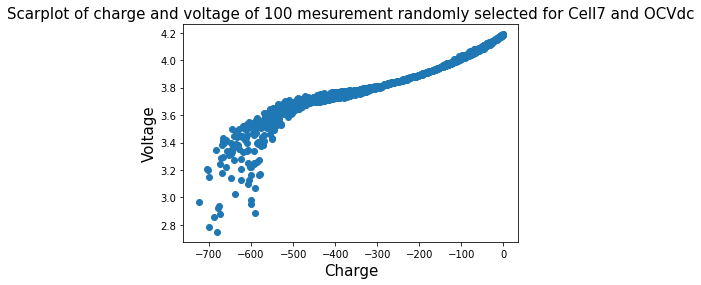

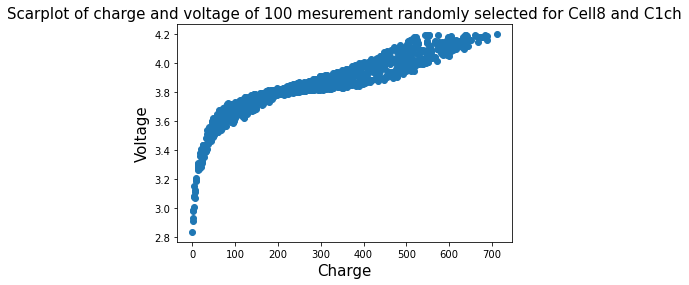

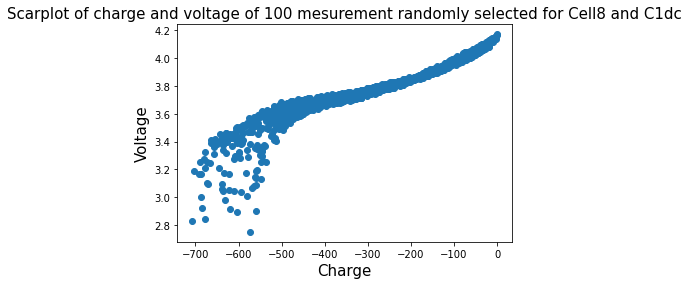

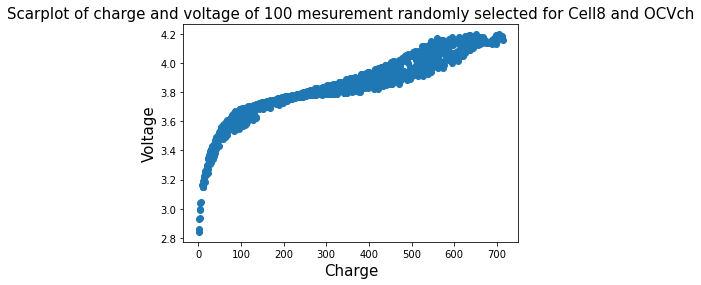

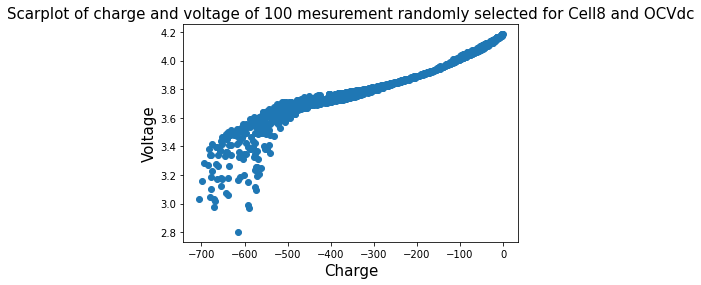

In [207]:
for cel in cells: 
    for typ in types:
        dff_Cell=dff[dff['cell']==cel]
        dff_Cell=dff_Cell[dff_Cell['type']==typ]
        a=dff_Cell.sample(1000)
        plt.scatter(a['q'],a['v'])
        plt.ylabel('Voltage', fontsize = 15)
        plt.xlabel('Charge', fontsize = 15)
        plt.title('Scarplot of charge and voltage of 100 mesurement randomly selected for '+cel+' and '+typ, fontsize = 15)
        plt.show()



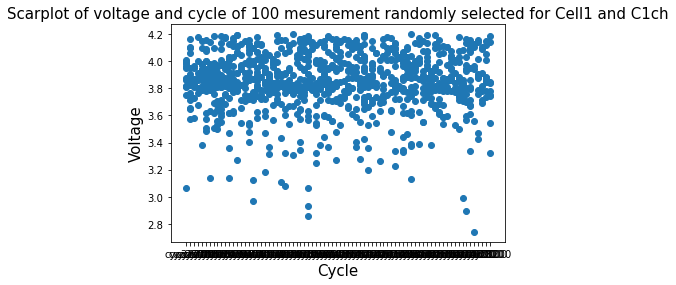

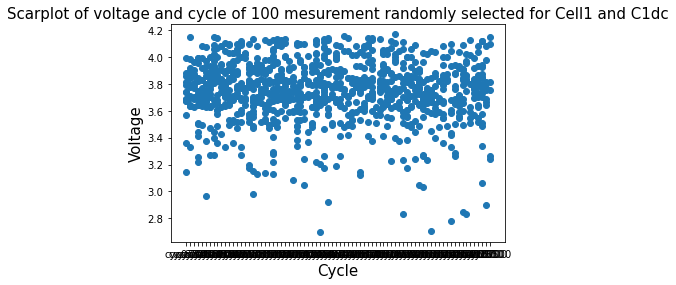

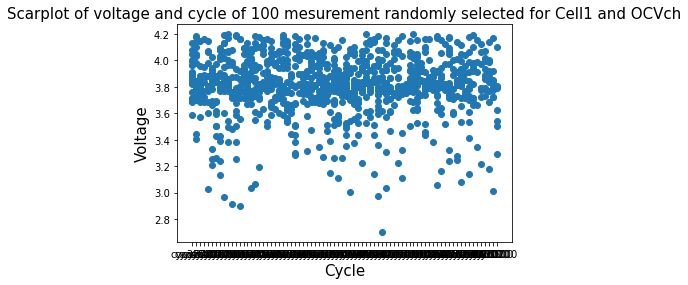

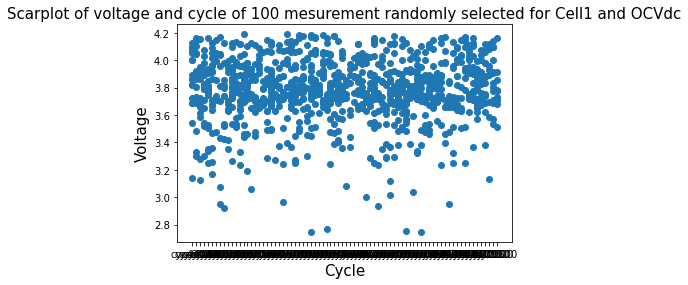

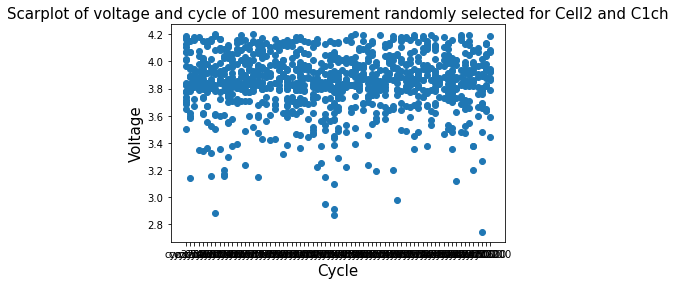

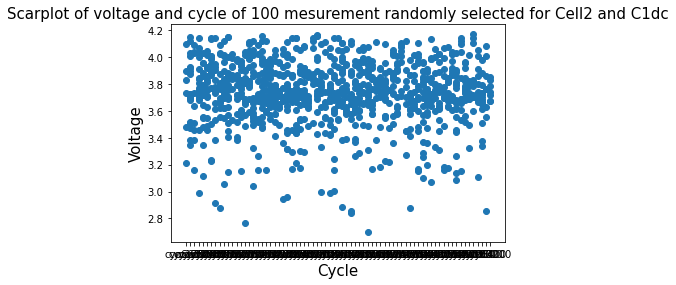

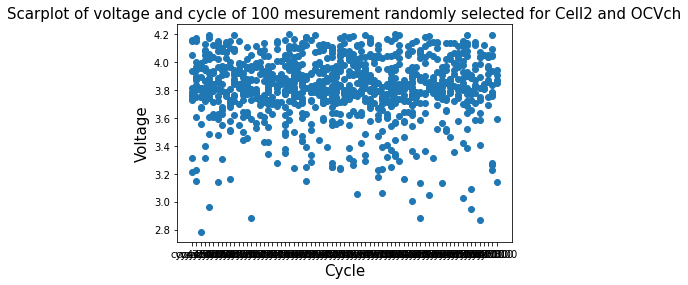

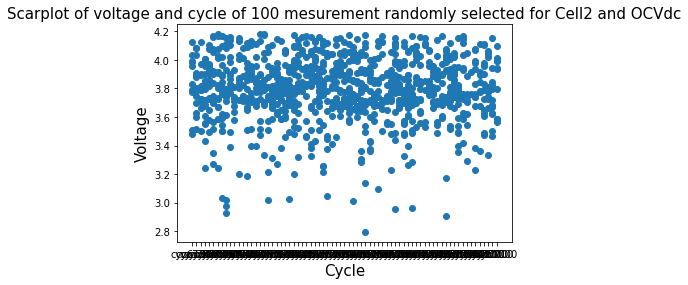

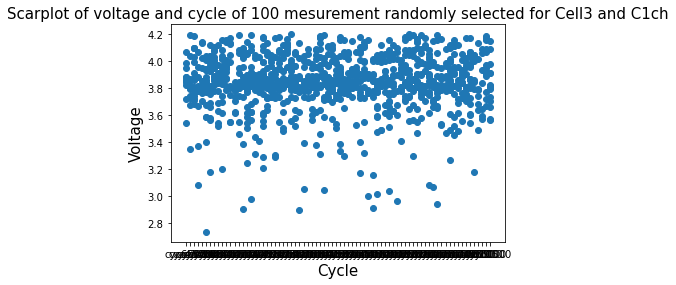

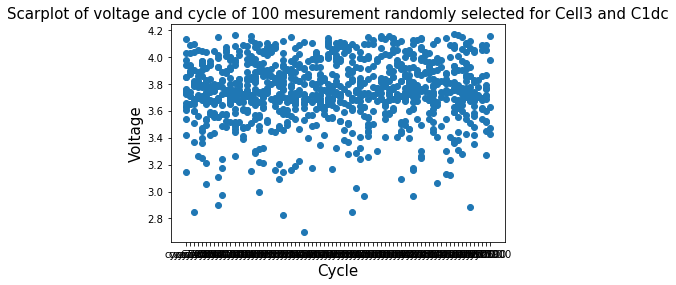

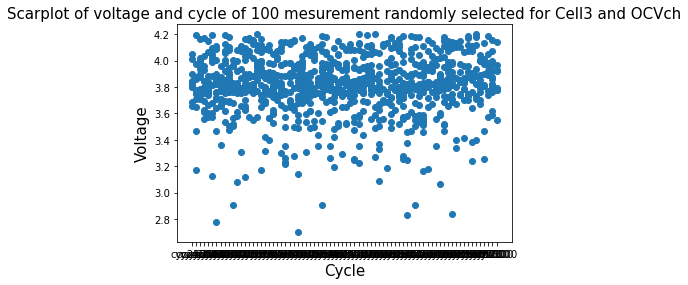

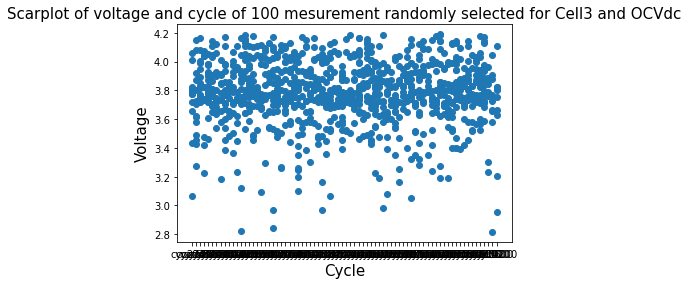

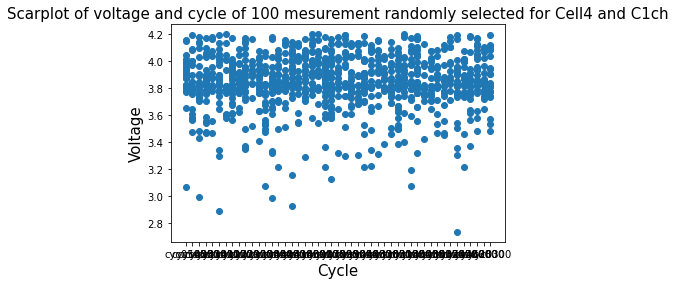

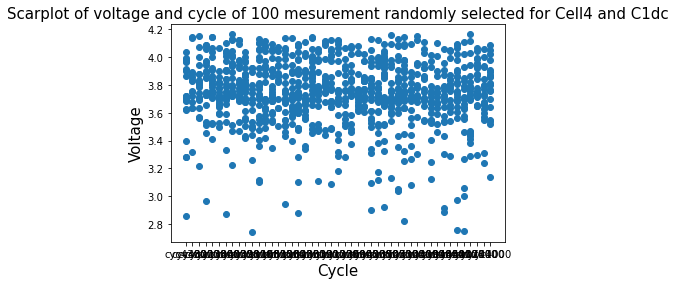

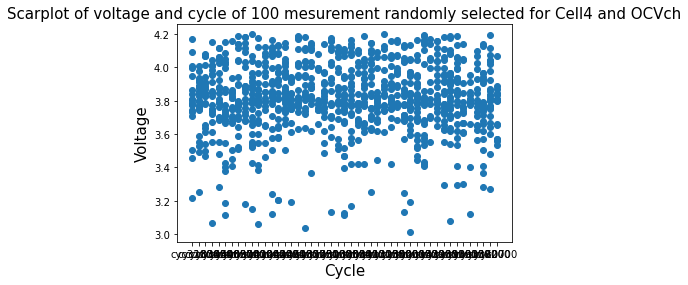

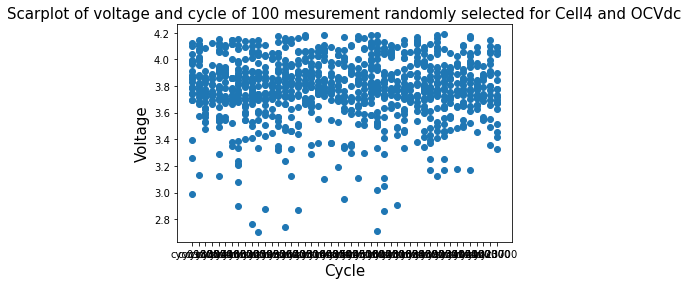

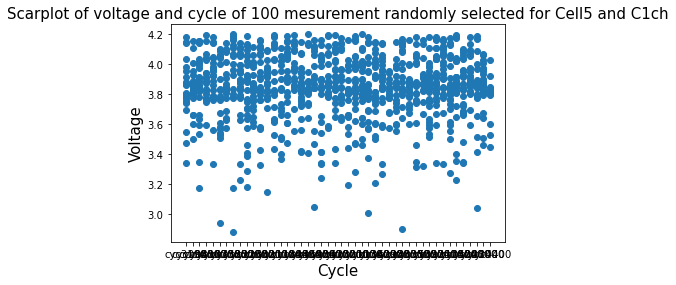

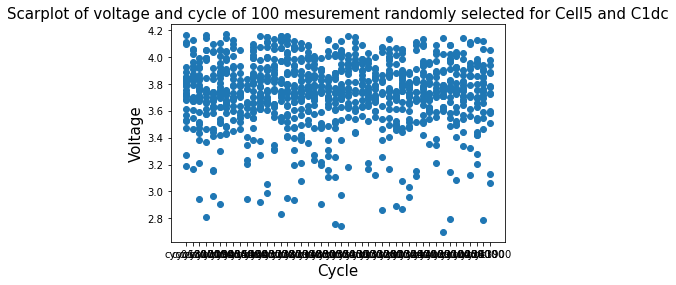

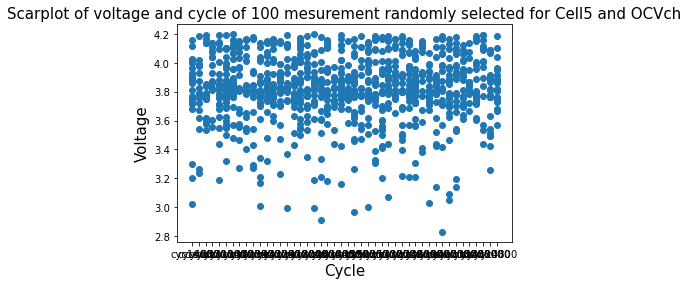

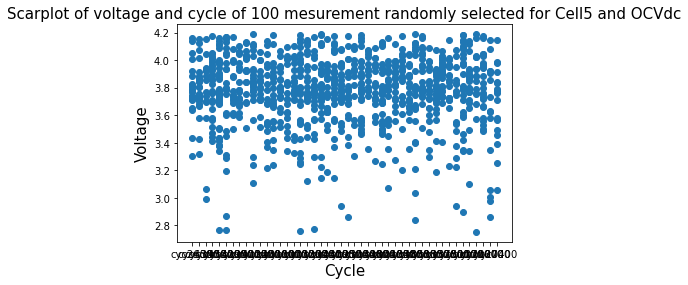

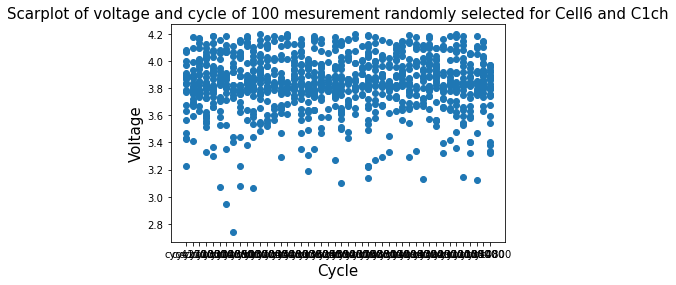

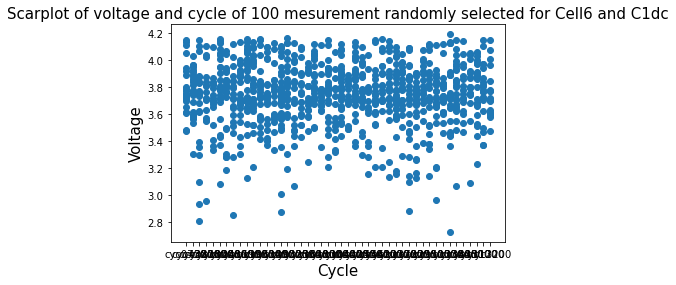

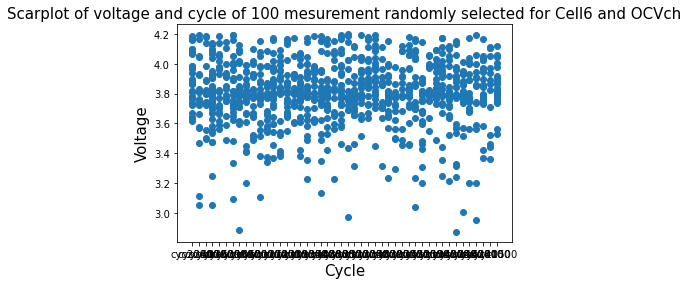

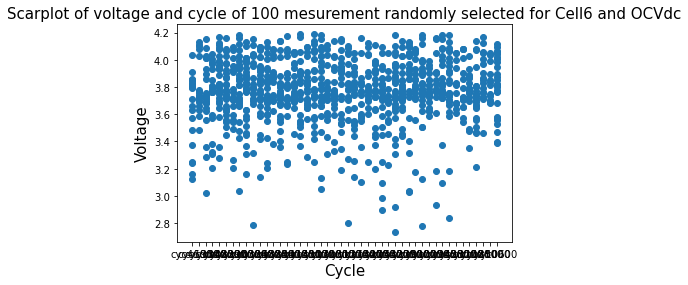

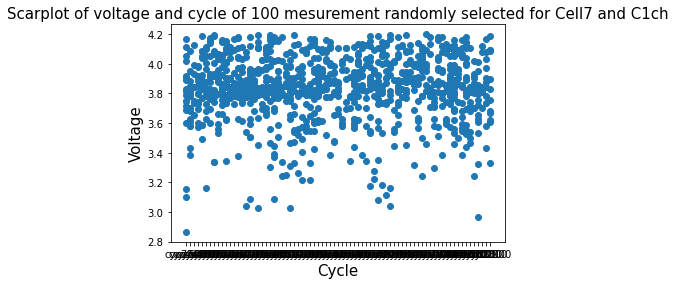

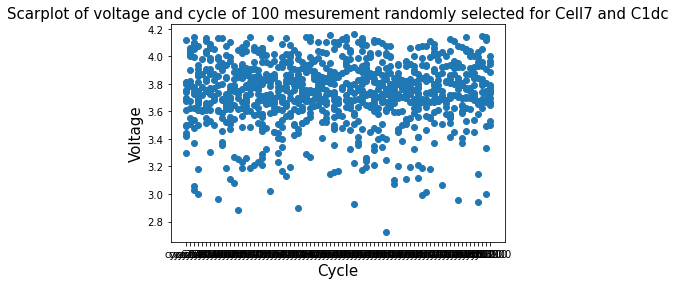

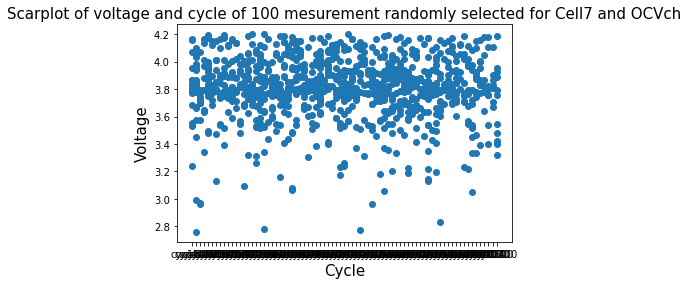

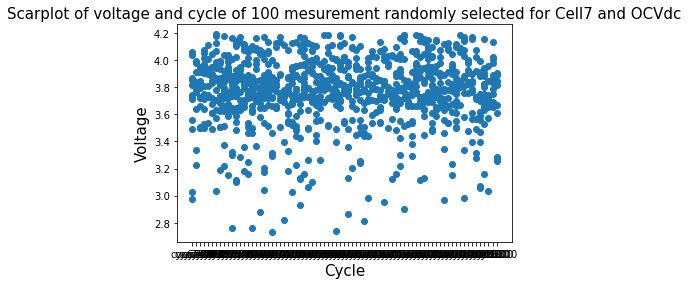

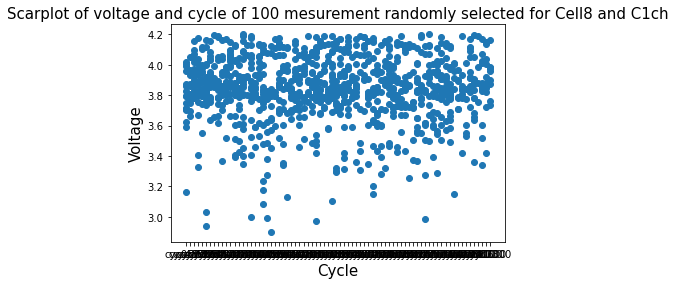

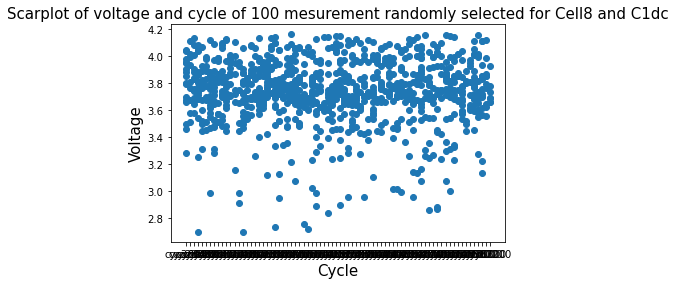

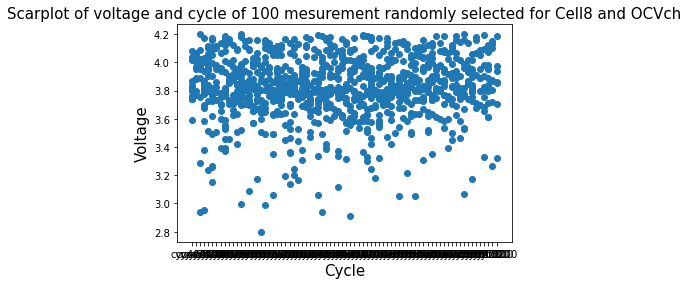

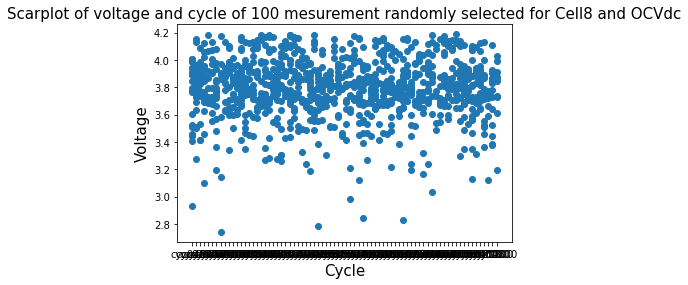

In [117]:
for cel in cells: 
    for typ in types:
        dff_Cell=dff[dff['cell']==cel]
        dff_Cell=dff_Cell[dff_Cell['type']==typ]
        a=dff_Cell.sample(1000)
        plt.scatter(a['cycle'],a['v'])
        plt.ylabel('Voltage', fontsize = 15)
        plt.xlabel('Cycle', fontsize = 15)
        plt.title('Scarplot of voltage and cycle of 100 mesurement randomly selected for '+cel+' and '+typ, fontsize = 15)
        plt.show()



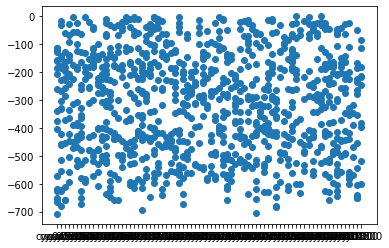

In [119]:

        plt.scatter(a['cycle'],a['q'])
        #plt.ylabel('Voltage', fontsize = 15)
        #plt.xlabel('Charge', fontsize = 15)
        #plt.title('Scarplot of charge and voltage of 100 mesurement randomly selected for '+cel+' and '+typ, fontsize = 15)
        plt.show()

In [95]:

a=dff_Cell1.sample(1000)
a

,t,v,q,T,type,cycle,cell
2041,736256.755063,3.950225,419.891058,40.363483,C1ch,cyc3900,Cell1
626,736490.520528,3.766154,128.803543,40.113808,C1ch,cyc6700,Cell1
2666,736071.621114,4.035739,548.416048,0.520985,C1ch,cyc1600,Cell1
1419,736308.515256,3.861816,291.930368,39.676941,C1ch,cyc4600,Cell1
325,736177.827741,3.613711,66.851617,40.163750,C1ch,cyc2900,Cell1
...,...,...,...,...,...,...,...
3239,736049.436045,4.190698,666.203783,40.276104,C1ch,cyc1300,Cell1
578,736096.572647,3.684308,118.894975,40.176216,C1ch,cyc1900,Cell1
2398,736394.051553,4.082074,493.331299,40.850254,C1ch,cyc5500,Cell1
1631,736006.850166,3.830626,335.488397,39.614529,C1ch,cyc0700,Cell1


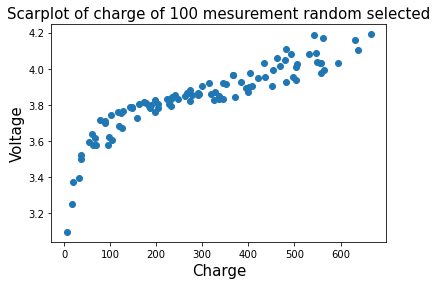

In [99]:
plt.scatter(a['q'],a['v'])
plt.ylabel('Voltage', fontsize = 15)
plt.xlabel('Charge', fontsize = 15)
plt.title('Scarplot of charge of 100 mesurement random selected', fontsize = 15)

plt.show()

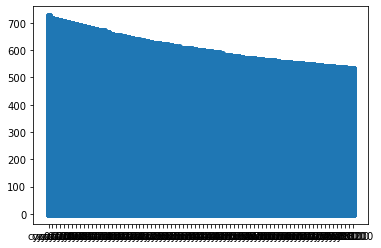

In [77]:
plt.scatter(dff_Cell1['cycle'],dff_Cell1['q'])

In [38]:
dff.head


<bound method NDFrame.head of                    t         v           q          T   type    cycle   cell
0      735954.858966  2.719213   -0.000049  41.295536   C1ch  cyc0000  Cell1
1      735954.858977  2.856135    0.206339  41.000046   C1ch  cyc0000  Cell1
2      735954.858989  2.877108    0.412724  40.962608   C1ch  cyc0000  Cell1
3      735954.859000  2.892908    0.619110  40.987579   C1ch  cyc0000  Cell1
4      735954.859012  2.906382    0.825497  41.049992   C1ch  cyc0000  Cell1
...              ...       ...         ...        ...    ...      ...    ...
10253  736594.460308  2.712320 -569.170029  39.856884  OCVdc  cyc8000  Cell8
10254  736594.460365  2.708672 -569.225542  39.819447  OCVdc  cyc8000  Cell8
10255  736594.460423  2.704863 -569.281054  39.856884  OCVdc  cyc8000  Cell8
10256  736594.460481  2.701214 -569.336567  39.856884  OCVdc  cyc8000  Cell8
10257  736594.460498  2.699971 -569.352707  39.881855  OCVdc  cyc8000  Cell8

[15264130 rows x 7 columns]>